In [5]:
import numpy as np
from sklearn.decomposition import KernelPCA
from sklearn.svm import SVC



from ND_path_finder.src.data_generators.perlin_generator import PerlinNoiseGenerator
from ND_path_finder.src.data_samplers.random_sampler import sample_xarray

In [8]:
# Step 1: Generate example N-dimensional data
N = 3  # Number of dimensions
num_samples = 50
np.random.seed(42)

# Randomly generate data points
X = np.random.rand(num_samples, N) * 10  # N-dimensional input
y = np.random.choice([0, 1], size=num_samples)  # Binary labels



generator_3D = PerlinNoiseGenerator(res=[30, 30, 30], octv=1, seed=47, time_test=False)
xdataset_3D = generator_3D.perlin_data_xarray()
xdataset_3D = sample_xarray(xdataset_3D, 100)


# Extract features and labels
X = xdataset_3D['points'].values  # Shape (num_points, dim)
y = xdataset_3D['noise_values'].values  # Shape (num_points,)





# Step 2: Apply KernelPCA to transform data
kpca = KernelPCA(kernel='rbf', gamma=0.5, n_components=min(10, num_samples))  # Transform to kernel space
X_transformed = kpca.fit_transform(X)

# Step 3: Train a linear SVM in the transformed space
linear_svm = SVC(kernel='linear')
linear_svm.fit(X_transformed, y)

# Get the weights and intercept from the trained linear SVM
w = linear_svm.coef_[0]  # Weight vector in transformed space
b = linear_svm.intercept_[0]  # Intercept

# Step 4: Generate points near the decision boundary in the original space
def find_boundary_points(X, kpca, w, b, num_boundary_points=100):
    """
    Find points near the decision boundary f(x) = 0 in the original space.
    """
    boundary_points = []
    for _ in range(num_boundary_points):
        # Randomly sample a point in the original space
        x_sample = np.random.rand(N) * 10

        # Transform the point into kernel space
        x_transformed = kpca.transform(x_sample.reshape(1, -1))

        # Compute the decision function value
        decision_value = np.dot(w, x_transformed[0]) + b

        # Adjust the point along the gradient of the decision function to bring it closer to f(x) = 0
        adjustment = -decision_value / np.linalg.norm(w)
        x_boundary = x_sample + adjustment * w[:N]

        boundary_points.append(x_boundary)

    return np.array(boundary_points)

# Generate points near the decision boundary
boundary_points = find_boundary_points(X, kpca, w, b)

# Step 5: Analyze or use boundary points
print("Points on the decision boundary:")
print(boundary_points)


Points on the decision boundary:
[[ 9.07942057  3.92399093  5.10425875]
 [ 8.05128898  6.70517189  7.27890644]
 [ 1.76490413  5.36275046  6.88458924]
 [ 1.95968814  1.69781999  9.74842868]
 [ 4.84054684  2.55656247  9.88928225]
 [ 9.32838144  5.53120525  8.75310868]
 [ 1.56125901  2.73698424  6.93032355]
 [ 8.14079934  8.51151364  3.97182652]
 [ 8.55188891  8.45755521  9.28309519]
 [ 7.52759443  6.63815326  5.73361146]
 [ 3.39701559  9.34960514  9.66338362]
 [ 2.51341821  3.00191258  4.7828874 ]
 [ 4.15842935  9.89284534  1.68599778]
 [-0.14414905  4.88735225  1.71517681]
 [ 3.33887577  7.38997595  7.13614449]
 [ 2.75479584  5.37367302  5.01488602]
 [ 6.0375141   2.4528889   5.82545372]
 [ 9.46311651  4.81569225  8.98773313]
 [ 4.01813158  3.44905479  6.37777887]
 [ 6.36342852  8.58994637  2.22859793]
 [ 4.66612172  5.66831271  7.61228539]
 [ 0.11022564  9.89377583  4.62619039]
 [ 2.46979134  8.78321094  7.40393299]
 [ 9.20490639  3.25577376  5.45439492]
 [ 5.39711261  9.75158655  0.68

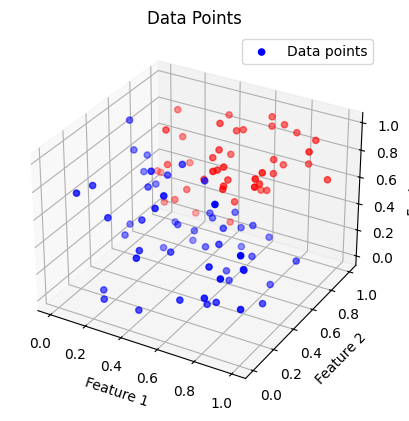

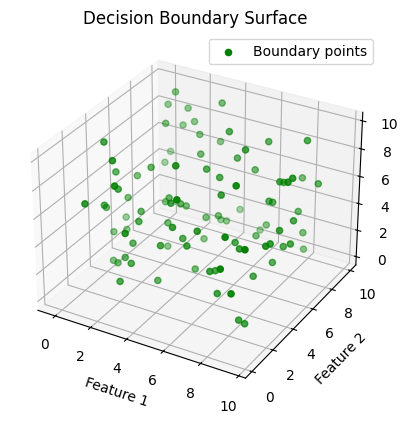

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Plot 1: Scatter plot of the original data points
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection='3d')
ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='bwr', label='Data points')
ax1.set_title('Data Points')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.set_zlabel('Feature 3')
ax1.legend()

# Plot 2: Scatter plot of the decision boundary points
fig2 = plt.figure()
ax2 = fig2.add_subplot(111, projection='3d')
ax2.scatter(boundary_points[:, 0], boundary_points[:, 1], boundary_points[:, 2], c='green', label='Boundary points')
ax2.set_title('Decision Boundary Surface')
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')
ax2.set_zlabel('Feature 3')
ax2.legend()

plt.show()